Выбранный мной датасет представляет данные о покупателях некотрого интернет-магазина одежды и включает в себя сведения о персональных данных этих покупателей, которые интересны магазину.

### Проводим первичный анализ данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

ModuleNotFoundError: No module named 'seaborn'

Считываем файл

In [ ]:
df = pd.read_csv('/shopping_trends.csv')

Смотрим информацию по колонкам

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

**Видим, что пропусков нет**


Ищем дубликаты

In [ ]:
df[df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


**Дубликатов тоже нет**

Посмотрим как выглядят данные на примере первых 5 строчек

In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


**Сравнив содержимое колонок с типами данных, которые опредедились автоматически, можем сделать вывод, что всё правильно и вручную менять ничего не нужно**

**Датасет состоит из 18 колонок: id покупателя, его возраст, пол, наименование купленного товара, вид купленного товара, количество покупок, место нахождения магазина, размер купленного товара, цвет купленного товара, сезон совершения покупки, отзыв о покупке, наличие подписки, способ оплаты, способ доставки, применение скидки, применение промокода, количество предыдущих покупок, предпочтительный метод оплаты у покупателя, частота покупок.**

###Проводим вторичный внализ

*1. Узнаем максимальный, минимальный и средний возраст покупателей*

In [ ]:
df['Age'].describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

**Видим, что минимальный возраст покупателя - 18 лет, максимальный - 70 лет, а средний - примено 44 года**

*2. Каков ассортимент предлагаемых товаров?*

In [ ]:
df['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

**В датасете рассматривается 25 видов товаров, которые перечислены выше**

*3. Какой процент от всех покупателей пользуется магазинами "по подписке"?*

In [ ]:
df[df['Subscription Status'] == 'Yes'].shape[0] / df.shape[0] * 100

27.0

*4. Как распределяются покупки между сезонами?*

In [ ]:
seasons = df.groupby('Season').agg('count')['Customer ID']

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

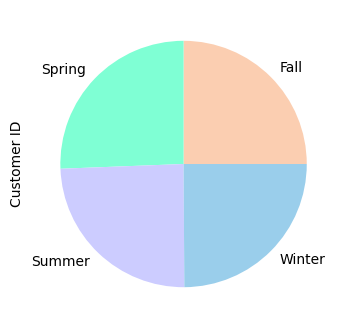

In [ ]:
colors = ['#FBCEB1', '#7FFFD4', '#CCCCFF', '#9ACEEB']
seasons.plot.pie(figsize=(4,4), fontsize=10, colors=colors) #procennts `
seasons

**Из диаграммы видно, что нет определённого лидирующего сезона по покупкам, на протяжении всего года совершается примерно одинаковое количество покупок (весной немного больше)**

*5. Действительно ли люди покупают тёплые вещи - свитера, пальто, куртки - люди покупают в соответствующие "холодные" сезоны?*

<Axes: xlabel='Season'>

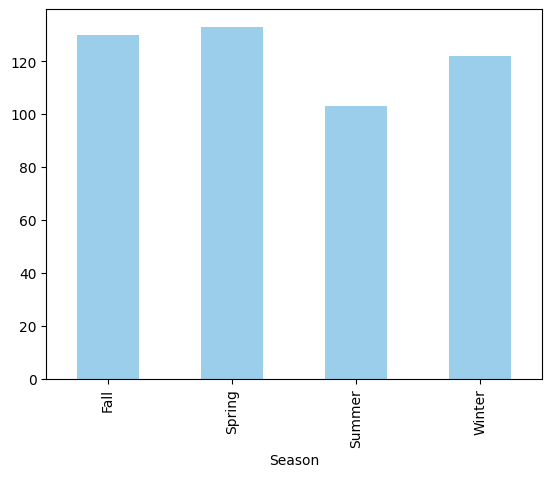

In [ ]:
df[(df['Item Purchased'] == 'Sweater') | (df['Item Purchased'] == 'Coat') | (df['Item Purchased'] == 'Jacket')].groupby('Season').agg('count')['Age'].plot.bar(color='#9ACEEB')

**Действительно из графика видно, что весенний период занимает лидирующую позицию по покупке тёплых вещей (возможно потому что в этот период большинство магазинов проводят распродажи коллекций предыдущих сезонов - как раз тёплых осенние-зимних вещей), кроме того осень и зима тоже отличаются высокими продажами тёплых вещей из-за их сезонности**

*6. Как зависит количество уже совершённых покупок от возраста клиента?*



<Axes: xlabel='Previous Purchases', ylabel='Age'>

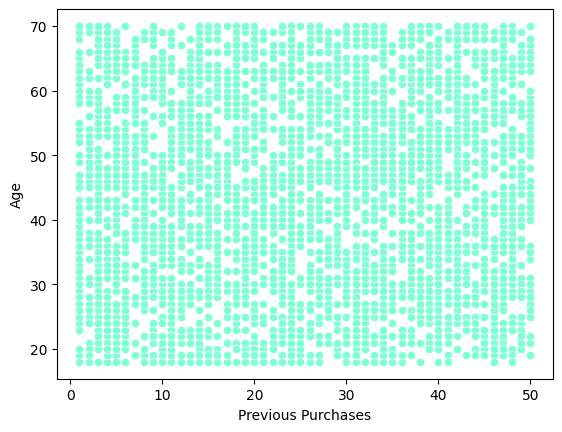

In [ ]:
sns.scatterplot(data=df, x='Previous Purchases', y='Age', color='#7FFFD4')

**Видим, что никакой зависимости количества предыдущих покупок и возраста клиента нет**

*7.Как распределены отзывы покупателей о магазине?*

<Axes: ylabel='Review Rating'>

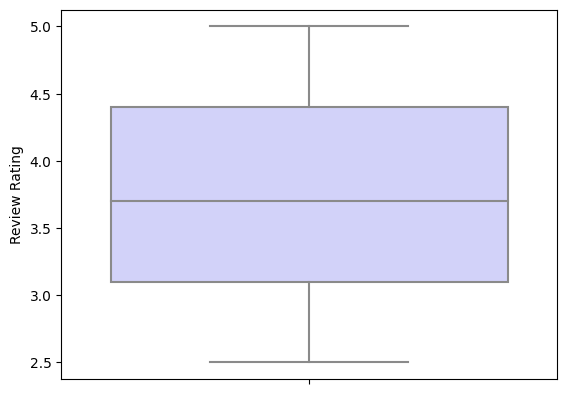

In [ ]:
sns.boxplot(y=df['Review Rating'], color='#CCCCFF')

**Видим, что минимальная оценка за отзыв - 2.5 звезды, максимальная - 5.**
**В основном люди ставят от 3 до 4.5 звёзд, наиболее популярное значение - примерно 3.75**

*8. Как зависит количество потраченных людьми денег на покупки от их возраста?*

<ipython-input-37-b312db7622ec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').agg('mean')['Purchase Amount (USD)'].plot.bar(x='Age', y='Purchase Amount (USD)', color='#FBCEB1', figsize=(10, 8))


<Axes: xlabel='Age'>

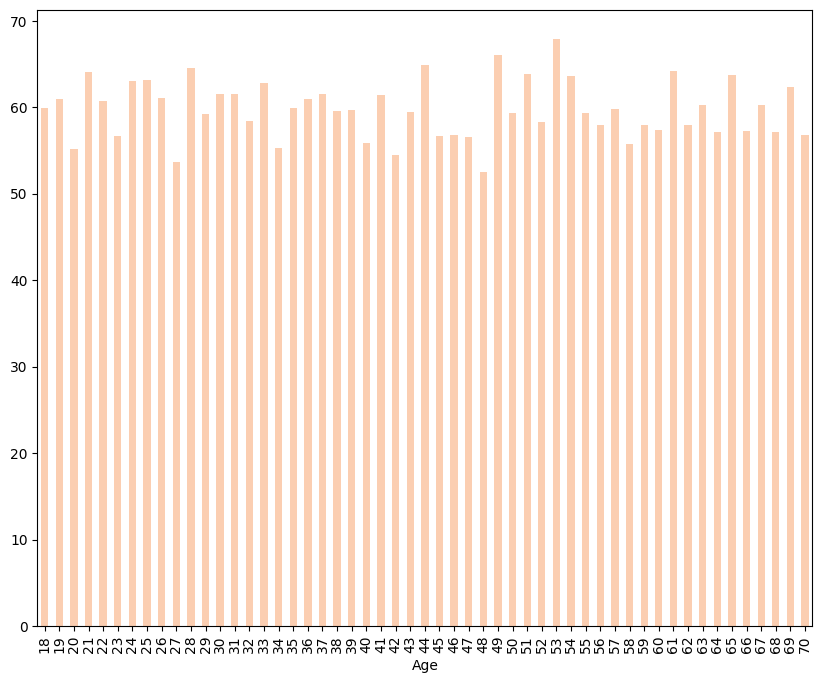

In [ ]:
df.groupby('Age').agg('mean')['Purchase Amount (USD)'].plot.bar(x='Age', y='Purchase Amount (USD)', color='#FBCEB1', figsize=(10, 8))

**В целом, какую-то зависимость отследить тоже трудно, все результаты лежат в диапазоне от 50 до примерно 67. Определённой динамики результатов не наблюдается**

**Таким образом, у меня получилось найти некоторые закономерности, однако несколько моих предположений оказались неверны - зависимости между выбранными мной показателями не оказалось.**